In [133]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.schema import Table, DropTable
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import dateutil
import nltk
import re
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Przefur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Przefur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Przefur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [134]:
%matplotlib inline

In [135]:
Session = sessionmaker()
engine = create_engine('sqlite:///ztis.db')

In [136]:
feeds = pd.read_sql_query('SELECT * FROM ztis', engine)
print("There are %d news in database." % (feeds.shape[0]))

There are 12511 news in database.


In [144]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
new_words = ["http", "feed", "news", "href", "com", "img", "scr", "defoult", "reuters", "ff", "div", "class", 
             "feedflare", "auoc", "feedburner", "src", "worldnews", "yil", "height", "width", "default", "c", "p", "r",
            "new", "www", "alt'", "aligne left", "za", "zbnmyn"]
stop_words = stop_words.union(new_words)


tekstFeeds = feeds[["id", "title", "summary"]]
tekstFeeds["text"] = tekstFeeds['title'] + " " + tekstFeeds['summary']



C:\Users\Przefur\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


([<matplotlib.axis.XTick at 0x39e7fdd8>,
 <a list of 20 Text xticklabel objects>)

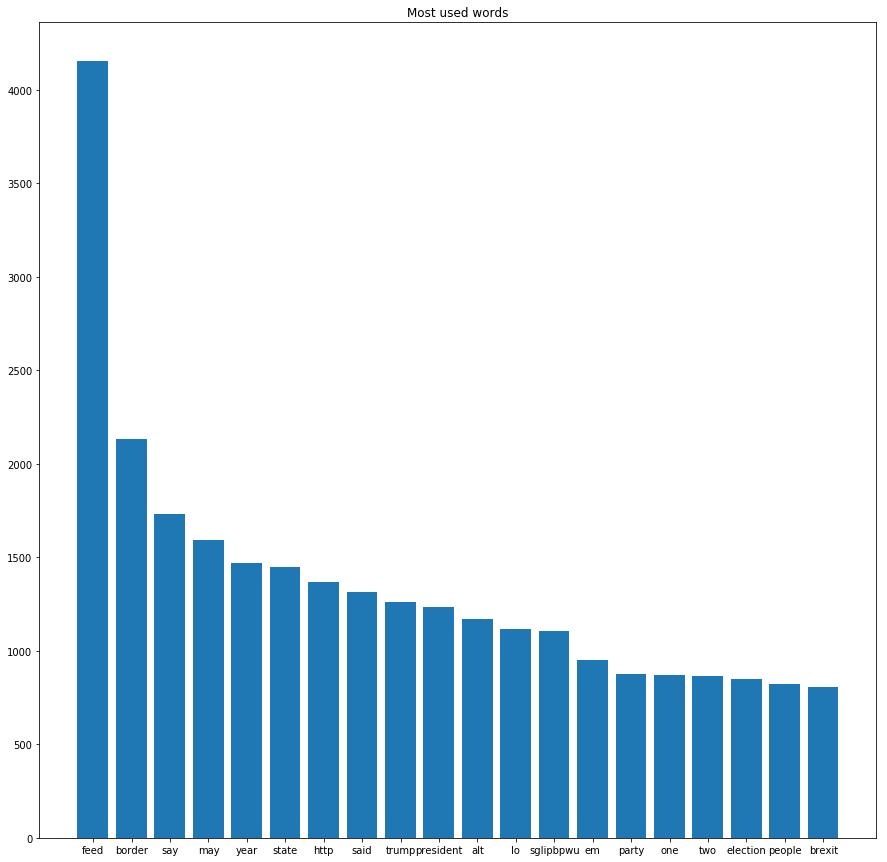

In [145]:


corpus = []
for i in range(0, feeds['summary'].shape[0]):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', feeds['summary'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    #remove single instances of a letter
    text = re.sub(r'(?:^| )\w(?:$| )', ' ', text).strip()
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

from collections import Counter
#print(corpus)
Ct = Counter(" ".join(corpus).split()).most_common(20)
labels, values = zip(*Counter(" ".join(corpus).split()).most_common(20))
indexes = np.arange(len(labels))
width = 0.8

plt.figure(figsize=(15,15))
plt.title("Most used words")
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.01, labels)

C:\Users\Przefur\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.XTick at 0x3322b2b0>,
 <a list of 20 Text xticklabel objects>)

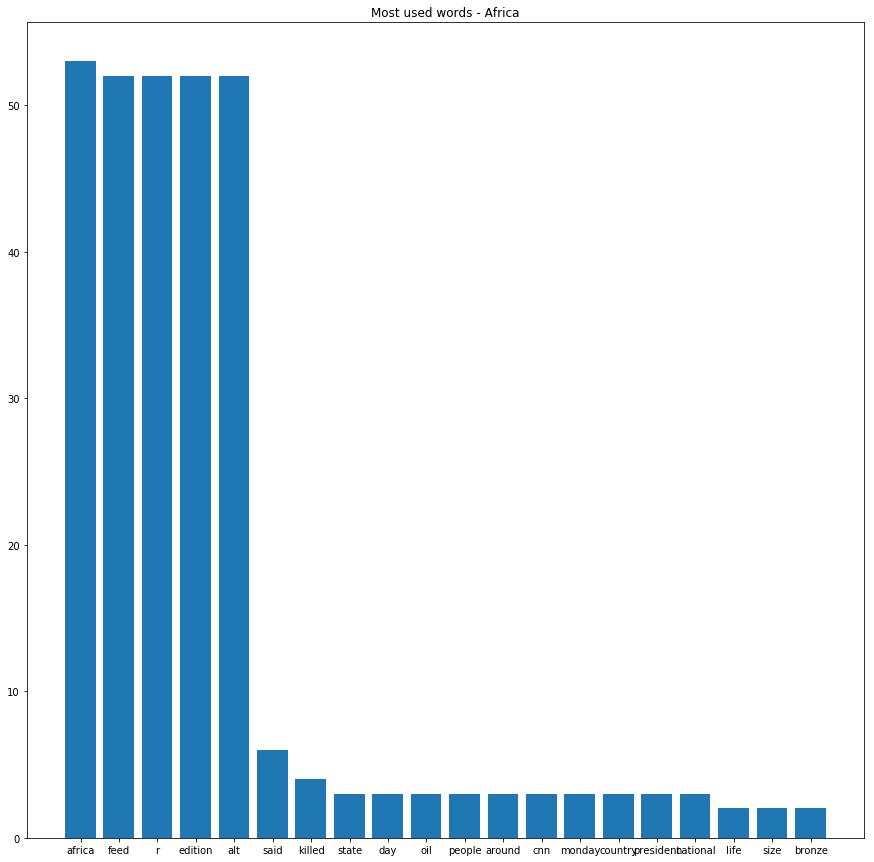

In [146]:
africa_feed = pd.read_sql_query("SELECT * FROM ztis WHERE source = 'CNN - Africa\n'", engine)
tekstFeeds = africa_feed[["id", "title", "summary"]]
tekstFeeds["text"] = tekstFeeds['title'] + " " + tekstFeeds['summary']
#feeds['summary'].apply(lambda x: [item for item in x if item not in stop])
corpus = []
for i in range(0, africa_feed['summary'].shape[0]):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', africa_feed['summary'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # further removing html tags
    text = re.sub("<[^>]+>"," ",text)
    
    #remove single instances of a letter
    text = re.sub(r'(?:^| )\w(?:$| )', ' ', text).strip()
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)
Ct = Counter(" ".join(corpus).split()).most_common(20)

labels, values = zip(*Counter(" ".join(corpus).split()).most_common(20))
indexes = np.arange(len(labels))
width = 0.8

plt.figure(figsize=(15,15))
plt.title("Most used words - Africa")
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.01, labels)

C:\Users\Przefur\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.XTick at 0x3a7d0f60>,
 <a list of 20 Text xticklabel objects>)

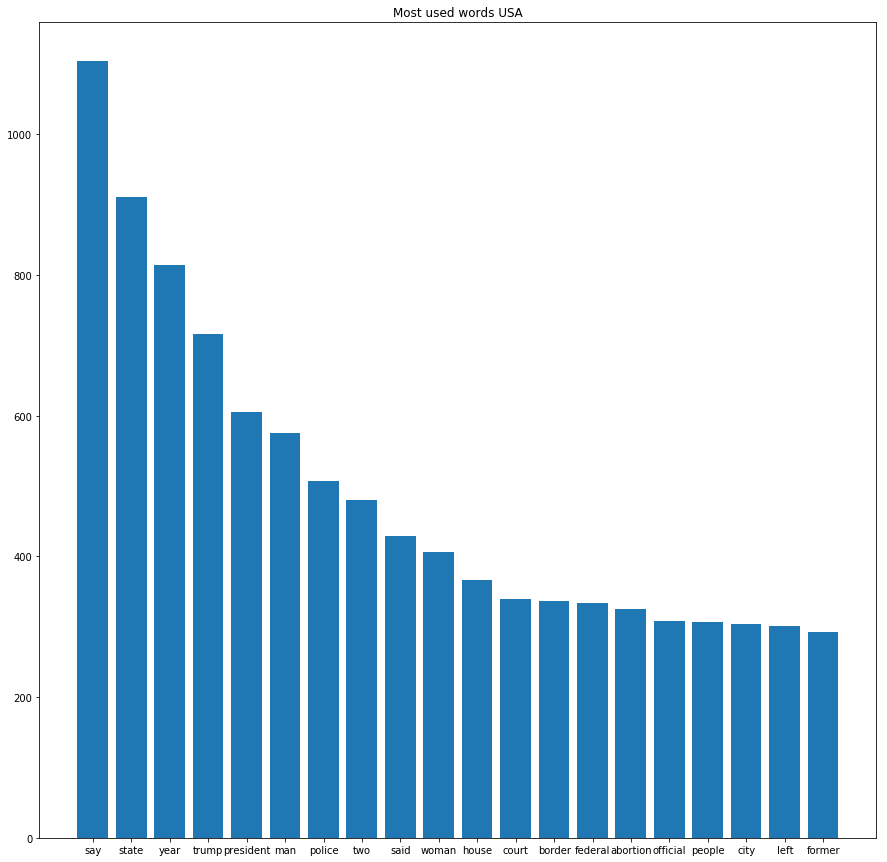

In [147]:
usa_feed = pd.read_sql_query("SELECT * FROM ztis WHERE source in ('Washington Post\n','ABC News - USA\n','CBS News - USA\n','NY Times\n','USA Today\n','Yahoo - USA\n','NewYorker\n','US News\n','LA Times - USA\n')", engine)
tekstFeeds = usa_feed[["id", "title", "summary"]]
tekstFeeds["text"] = tekstFeeds['title'] + " " + tekstFeeds['summary']
#feeds['summary'].apply(lambda x: [item for item in x if item not in stop])
corpus = []
for i in range(0, usa_feed['summary'].shape[0]):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', usa_feed['summary'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # further removing html tags
    text = re.sub("<[^>]+>"," ",text)
    
    #remove single instances of a letter
    text = re.sub(r'(?:^| )\w(?:$| )', ' ', text).strip()
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)
Ct = Counter(" ".join(corpus).split()).most_common(20)
labels, values = zip(*Counter(" ".join(corpus).split()).most_common(20))
indexes = np.arange(len(labels))
width = 0.8

plt.figure(figsize=(15,15))
plt.title("Most used words USA")
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.01, labels)

C:\Users\Przefur\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.XTick at 0x3a9ac198>,
 <a list of 20 Text xticklabel objects>)

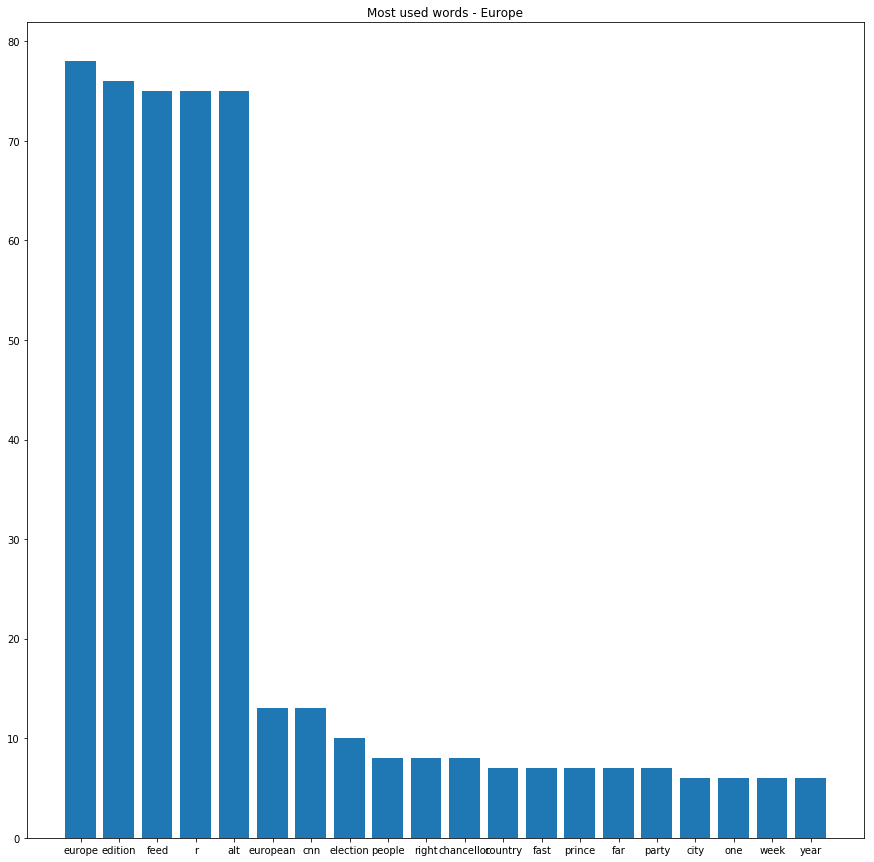

In [148]:
europe_feed = pd.read_sql_query("SELECT * FROM ztis WHERE source in ('BBC','The Daily Telegraph\n','CNN - Europe\n')", engine)
tekstFeeds = europe_feed[["id", "title", "summary"]]
tekstFeeds["text"] = tekstFeeds['title'] + " " + tekstFeeds['summary']
#feeds['summary'].apply(lambda x: [item for item in x if item not in stop])
corpus = []
for i in range(0, europe_feed['summary'].shape[0]):
    #Remove punctuations

    text = re.sub('[^a-zA-Z]', ' ', europe_feed['summary'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # further removing html tags
    text = re.sub("<[^>]+>"," ",text)
    
    #remove single instances of a letter
    text = re.sub(r'(?:^| )\w(?:$| )', ' ', text).strip()
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)
Ct = Counter(" ".join(corpus).split()).most_common(20)
labels, values = zip(*Counter(" ".join(corpus).split()).most_common(20))
indexes = np.arange(len(labels))
width = 0.8


plt.figure(figsize=(15,15))
plt.title("Most used words - Europe")
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.01, labels)

C:\Users\Przefur\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.XTick at 0x3a95fba8>,
 <a list of 20 Text xticklabel objects>)

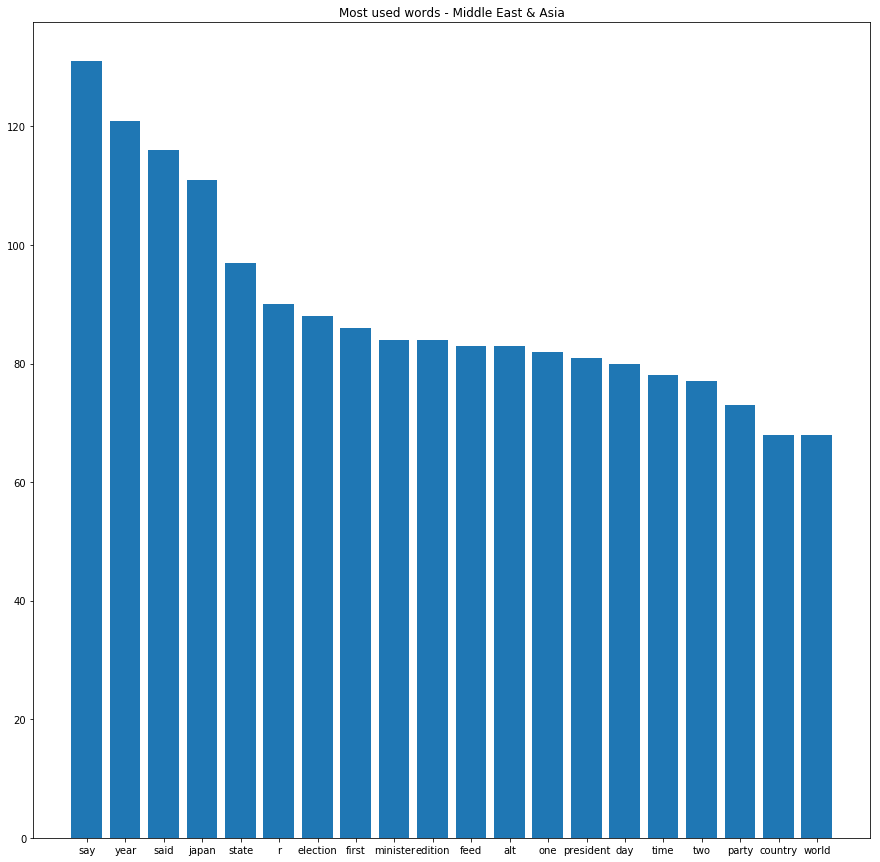

In [151]:
middleeast_asia = pd.read_sql_query("SELECT * FROM ztis WHERE source in ('Japan Times\n','The Times of Israel\n','Times of India\n','China Daily\n','CNN - Asia\n','CNN - Middle East\n')", engine)
tekstFeeds = middleeast_asia[["id", "title", "summary"]]
tekstFeeds["text"] = tekstFeeds['title'] + " " + tekstFeeds['summary']
#feeds['summary'].apply(lambda x: [item for item in x if item not in stop])
corpus = []
for i in range(0, middleeast_asia['summary'].shape[0]):
    #Remove punctuations

    text = re.sub('[^a-zA-Z]', ' ', middleeast_asia['summary'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # further removing html tags
    text = re.sub("<[^>]+>"," ",text)
    
    #remove single instances of a letter
    text = re.sub(r'(?:^| )\w(?:$| )', ' ', text).strip()
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

Ct = Counter(" ".join(corpus).split()).most_common(20)
labels, values = zip(*Counter(" ".join(corpus).split()).most_common(20))
indexes = np.arange(len(labels))
width = 0.8

plt.figure(figsize=(15,15))
plt.title("Most used words - Middle East & Asia")
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.01, labels)